# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('../resources/SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [4]:
sinasc1 = sinasc_raw
sinasc1['munResLatClass'] = sinasc1['munResLat'].apply(lambda x: 'Acima' if x >= -10.5 else 'Abaixo')
sinasc1.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,munResLatClass
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,Abaixo
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo


In [5]:
sinasc1_group = sinasc1[['munResLatClass', 'munResLon', 'munResArea']].groupby('munResLatClass')

In [53]:
sinasc1_group = sinasc1_group.aggregate(['sum', 'mean', 'min', 'max', 'median', 'var', 'std'])
sinasc1_group

munResLon                                                      \
                 sum         mean          min          max       median   
sum     3.828789e+09  -373.816255  -391.955610  -363.366898  -374.016542   
mean    5.469699e+08   -53.402322   -55.993659   -51.909557   -53.430935   
min    -1.696079e+06  -125.446498  -130.653100  -122.138170  -125.740890   
max     3.833815e+09     1.357935     0.003677     1.731679     1.847061   
median -8.480395e+05   -62.723249   -65.326550   -61.069085   -62.870445   
var     2.100652e+18  1919.258590  2032.239426  1829.952092  1940.765860   
std     1.449363e+09    43.809344    45.080366    42.777939    44.054124   

                              munResArea                              \
             var       std           sum          mean           min   
sum     7.155464  6.186754  2.648905e+16  1.268779e+08  1.324998e+05   
mean    1.022209  0.883822  3.784150e+15  1.812541e+07  1.892854e+04   
min     0.394002  0.182279  8.360143e+07  6.434344e+03  3.575825e+02   
max     1.910550  1.859178  2.648905e+16  1.267802e+08  1.278652e+05   
median  0.955275  0.929589  1.986863e+08  1.439614e+04  7.128270e+02   
var     0.273850  0.307147  1.002385e+32  2.295586e+15  2.307635e+09   
std     0.523307  0.554208  1.001192e+16  4.791227e+07  4.803785e+04   

                                                                
                 max        median           var           std  
sum     4.287838e+07  4.214797e+08  1.576481e+16  3.878752e+07  
mean    6.125483e+06  6.021139e+07  2.252115e+15  5.541075e+06  
min     6.534140e+03  5.067384e+03  3.236270e+07  5.688822e+03  
max     4.269499e+07  4.213417e+08  1.576481e+16  3.872077e+07  
median  2.947606e+04  2.052661e+04  1.255580e+08  1.008887e+04  
var     2.600364e+14  2.535849e+16  3.550416e+31  2.140624e+14  
std     1.612564e+07  1.592435e+08  5.958537e+15  1.463087e+07

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [13]:
sinasc2 = sinasc_raw
sinasc2['munResAreaClass'] = sinasc2['munResArea'].apply(lambda x: 'Acima' if x >= 3000 else 'Abaixo')
sinasc2.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,munResLatClass,munResAreaClass
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo,Acima
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo,Acima
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo,Acima
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,Abaixo,Acima
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo,Acima


In [14]:
sinasc2_group = sinasc2[['munResAreaClass', 'CODMUNNATU', 'STCESPARTO']].groupby('munResAreaClass')

In [54]:
sinasc2_group = sinasc2_group.aggregate(['sum', 'mean', 'min', 'max', 'median', 'var', 'std'])
sinasc2_group

CODMUNNATU                                               \
                          sum           mean       min       max    median   
munResAreaClass                                                              
Abaixo           8.053420e+08  155022.524928  110000.0  530010.0  110015.0   
Acima            3.186792e+09  147981.980729  110000.0  530010.0  110020.0   

                                             STCESPARTO                      \
                          var            std        sum      mean  min  max   
munResAreaClass                                                               
Abaixo           1.083503e+10  104091.466416    10718.0  2.079953  1.0  9.0   
Acima            9.590534e+09   97931.271657    49630.0  2.349016  1.0  9.0   

                                            
                median       var       std  
munResAreaClass                             
Abaixo             2.0  1.205951  1.098158  
Acima              2.0  1.982315  1.407947

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [22]:
sinasc3 = sinasc_raw
sinasc3['munResAltClass'] = sinasc3['munResAlt'].apply(lambda x: 'Acima' if x >= 300 else 'Abaixo')
sinasc3.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,munResLatClass,munResAreaClass,munResAltClass
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo,Acima,Acima
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo,Acima,Acima
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo,Acima,Acima
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,Abaixo,Acima,Acima
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo,Acima,Acima


In [23]:
sinasc3_group = sinasc3[['munResAltClass', 'SEMAGESTAC', 'PARIDADE']].groupby('munResAltClass')

In [55]:
sinasc3_group = sinasc3_group.aggregate(['sum', 'mean', 'min', 'max', 'median', 'var', 'std'])
sinasc3_group

SEMAGESTAC                                                    \
                      sum       mean   min   max median       var       std   
munResAltClass                                                                
Abaixo           898961.0  38.555541  19.0  45.0   39.0  4.127518  2.031629   
Acima             95691.0  38.678658  22.0  44.0   39.0  3.489500  1.868020   

               PARIDADE                                               
                    sum      mean min max median       var       std  
munResAltClass                                                        
Abaixo            15977  0.651033   0   1    1.0  0.227198  0.476653  
Acima              1558  0.626458   0   1    1.0  0.234103  0.483842

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [31]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [32]:
# Nova coluna baseada no map
sinasc4 = sinasc_raw[['munResNome', 'IDADEMAE', 'DTNASC']]
sinasc4['region'] = sinasc4['munResNome'].map(imediatas)

# Groupby na nova coluna 'region' e aplicando média
sinasc4_group = sinasc4.groupby('region').mean()
sinasc4_group


C:\Users\Lucas\AppData\Local\Temp\ipykernel_16484\3649987038.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc4['region'] = sinasc4['munResNome'].map(imediatas)


,IDADEMAE
region,
Ariquemes,25.459635
Cacoal,26.347817
Jaru,25.708853
Ji-Paraná,26.094720
Porto Velho,26.166303
Vilhena,26.417143


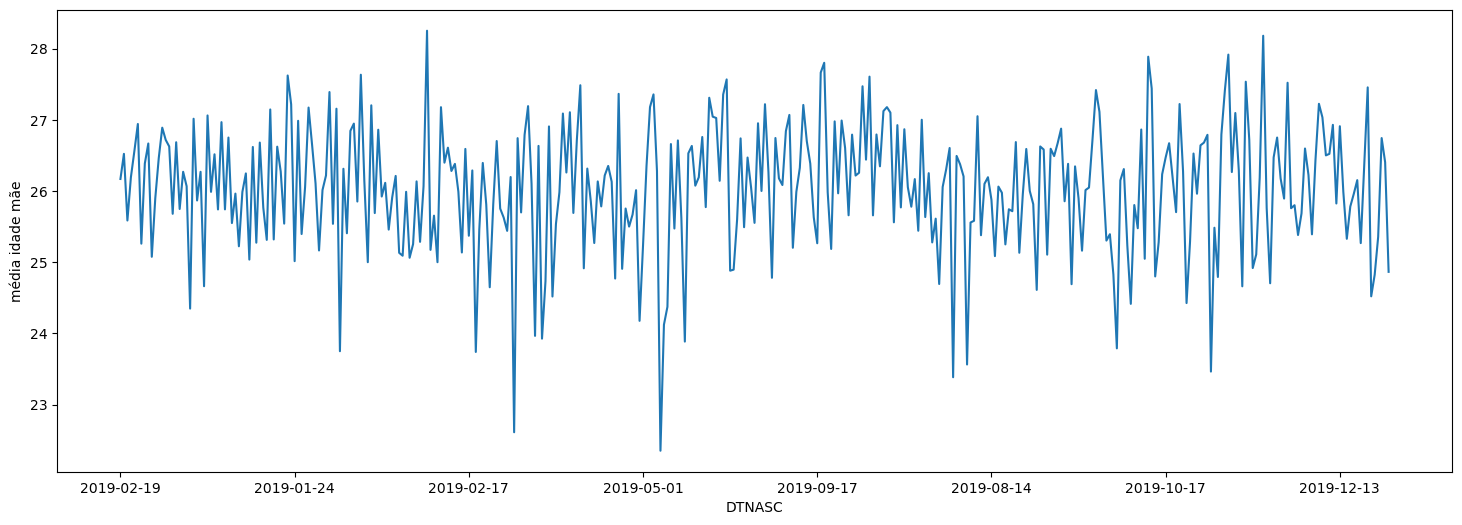

In [33]:
sinasc4_group = sinasc4.groupby('DTNASC', sort=False)['IDADEMAE'].mean()
sinasc4_group.plot(figsize=[18, 6])
plt.ylabel('média idade mãe');

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [34]:
# Função para extrair tabelas da url
def getUrlTables(url, index = 0, verbose = False):
    #pegando o link
    tables = pd.read_html(url)
    
    #as linhas abaixo corrigem a formatação estranha da tabela importada
    tables[index].columns = ['_'.join(col).strip() for col in tables[index].columns.values]
    tables[index].columns = tables[index].columns.str.split('_').str[1]
    
    if verbose == True:
        print(f"Quantidade de tabelas encontradas: {len(tables)}")
    return tables[index]

In [35]:
#Função para classificar o IDH
def classIdh(idh):    
    try:
        # Converte o valor para float se for um número válido
        idh = float(idh.replace(',', ''))
    except ValueError:
        # Caso a conversão falhe
        return 'Inválido'
    
    if idh >= 0.8:
        resultado = 'Muito Alto'
    elif idh < 0.8 and idh >= 0.7:
        resultado = 'Alto'
    elif idh < 0.7 and idh >= 0.55:
        resultado = 'Médio'
    else:
        resultado = 'Baixo'
    return resultado

In [36]:
table_a = getUrlTables('https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M')
table_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Posição          58 non-null     object
 1   Município        58 non-null     object
 2   IDH municipal    58 non-null     object
 3   IDH renda        58 non-null     object
 4   IDH longevidade  58 non-null     object
 5   IDH educação     58 non-null     object
dtypes: object(6)
memory usage: 2.8+ KB


In [37]:
#removendo linhas indesejadas
table_a = table_a.drop([0, 1, 9, 46, 56, 57])

In [38]:
table_a['classificaçãoIDH-Municipal'] = table_a['IDH municipal'].apply(classIdh)
table_a['classificaçãoIDH-Renda'] = table_a['IDH renda'].apply(classIdh)
table_a['classificaçãoIDH-Longevidade'] = table_a['IDH longevidade'].apply(classIdh)
table_a['classificaçãoIDH-Educação'] = table_a['IDH educação'].apply(classIdh)

table_a.head()

,Posição,Município,IDH municipal,IDH renda,IDH longevidade,IDH educação,classificaçãoIDH-Municipal,classificaçãoIDH-Renda,classificaçãoIDH-Longevidade,classificaçãoIDH-Educação
2,1,Porto Velho,0.736,0.764,0.819,0.638,Alto,Alto,Muito Alto,Médio
3,2,Vilhena,0.731,0.734,0.808,0.659,Alto,Alto,Muito Alto,Médio
4,3,Cacoal,0.718,0.727,0.821,0.620,Alto,Alto,Muito Alto,Médio
5,4,Ji-Paraná,0.714,0.728,0.810,0.617,Alto,Alto,Muito Alto,Médio
6,5,Pimenta Bueno,0.710,0.726,0.803,0.613,Alto,Alto,Muito Alto,Médio


In [39]:
#Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave
mapping = {
    'Muito Alto' : 'Alto',
    'Alto' : 'Alto',
    'Médio' : 'Não-Alto',
    'Baixo' : 'Não-Alto',
    'Inválido' : 'Não-Alto'
}

table_a['mapped_classificação'] = table_a['classificaçãoIDH-Municipal'].map(mapping)
table_a_group = table_a.set_index('mapped_classificação')
table_a_group_count = table_a_group.groupby(level=0).size()

table_a_group_count

mapped_classificação
Alto         7
Não-Alto    45
dtype: int64

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [40]:
#Função para classificar o IFDM
def classIfdm(ifdm):    
    try:
        # Converte o valor para float se for um número válido
        ifdm = float(ifdm.replace(',', ''))
    except ValueError:
        # Caso a conversão falhe
        return 'Inválido'
    
    if ifdm >= 0.8:
        resultado = 'Alto'
    elif ifdm < 0.8 and ifdm >= 0.6:
        resultado = 'Moderado'
    elif ifdm < 0.6 and ifdm >= 0.4:
        resultado = 'Regular'
    else:
        resultado = 'Baixo'
    return resultado

In [41]:
#pegando tabelas
table_b = getUrlTables('https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM', 0, True)
table_b.info()

Quantidade de tabelas encontradas: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Desenvolvimento alto  57 non-null     object
 1   Desenvolvimento alto  57 non-null     object
 2   Desenvolvimento alto  57 non-null     object
dtypes: object(3)
memory usage: 1.5+ KB


In [42]:
#removendo linhas indesejadas
table_b = table_b.drop([0, 1, 28, 55, 56])

In [43]:
#corrigindo má-importação
new_column_names = ['Posição', 'Município', 'IFDM Consolidado - 2013'] 
table_b.columns = new_column_names
table_b.head()

,Posição,Município,IFDM Consolidado - 2013
2,1º,Ariquemes,0.7746
3,2º,Vilhena,0.7465
4,3º,Pimenta Bueno,0.7383
5,4º,Porto Velho,0.7257
6,5º,Ji-Paraná,0.7117


In [44]:
#aplicando função
table_b['classificaçãoIFDM'] = table_b['IFDM Consolidado - 2013'].apply(classIfdm)
table_b.head()

,Posição,Município,IFDM Consolidado - 2013,classificaçãoIFDM
2,1º,Ariquemes,0.7746,Moderado
3,2º,Vilhena,0.7465,Moderado
4,3º,Pimenta Bueno,0.7383,Moderado
5,4º,Porto Velho,0.7257,Moderado
6,5º,Ji-Paraná,0.7117,Moderado


In [45]:
#Utilize a tabela do link e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave
mapping = {
    'Alto' : 'Acima da Média',
    'Moderado' : 'Acima da Média',
    'Regular' : 'Abaixo da Média',
    'Baixo' : 'Abaixo da Média',
    'Inválido' : 'Inválido'
}

table_b_group = table_b
table_b_group = table_b.set_index('classificaçãoIFDM')
table_b_group = table_b_group.groupby(mapping).size()
table_b_group


classificaçãoIFDM
Abaixo da Média    26
Acima da Média     26
dtype: int64

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [46]:
#Função para classificar a df de acordo com o pib
def classPib(df, column_name, value):
    df[column_name] = value
    return df

In [47]:
#pegando tabelas
table_c = []

#pegando cada tabela e agregando em uma matriz
table_c.append(getUrlTables('https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB', 0, True))
table_c.append(getUrlTables('https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB', 1))
table_c.append(getUrlTables('https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB', 2))
table_c.append(getUrlTables('https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB', 3))
table_c.append(getUrlTables('https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB', 4))
table_c.append(getUrlTables('https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB', 5))

#aplicando a função de classificação antes de fundir as tabelas
classPib(table_c[0], 'Classificação PIB', 'Acima de 1 Bilhão')
classPib(table_c[1], 'Classificação PIB', 'Acima de 500 Milhões')
classPib(table_c[2], 'Classificação PIB', 'Acima de 300 Milhões')
classPib(table_c[3], 'Classificação PIB', 'Acima de 200 Milhões')
classPib(table_c[4], 'Classificação PIB', 'Acima de 100 Milhões')
classPib(table_c[5], 'Classificação PIB', 'Até 100 Milhões')

#fundindo todas as tabelas em uma apenas
table_c_merge = pd.concat([table_c[0], table_c[1], table_c[2], table_c[3], table_c[4], table_c[5]], ignore_index=True)
table_c_merge.head(8)

Quantidade de tabelas encontradas: 9


,Em 2019,Mudança (2014),Município,PIB,Alteração,Classificação PIB,Em 2014,Mudança (2011)
0,1.0,(0),Porto Velho,17 912 070,NaN,Acima de 1 Bilhão,NaN,NaN
1,2.0,(0),Ji-Paraná,3 783 972,NaN,Acima de 1 Bilhão,NaN,NaN
2,3.0,(0),Vilhena,2 831 175,NaN,Acima de 1 Bilhão,NaN,NaN
3,4.0,(0),Ariquemes,2 579 830,NaN,Acima de 1 Bilhão,NaN,NaN
4,5.0,(0),Cacoal,2 261 644,NaN,Acima de 1 Bilhão,NaN,NaN
5,6.0,(0),Jaru,1 500 890,NaN,Acima de 1 Bilhão,NaN,NaN
6,7.0,(0),Rolim de Moura,1 283 434,NaN,Acima de 1 Bilhão,NaN,NaN
7,8.0,(0),Pimenta Bueno,1 164 877,NaN,Acima de 1 Bilhão,NaN,NaN


In [48]:
#Utilize a tabela do link e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave
mapping = {
    'Acima de 1 Bilhão' : 'Acima de Meio Milhão',
    'Acima de 500 Milhões' : 'Acima de Meio Milhão',
    'Acima de 300 Milhões' : 'Abaixo de Meio Milhão',
    'Acima de 200 Milhões' : 'Abaixo de Meio Milhão',
    'Acima de 100 Milhões' : 'Abaixo de Meio Milhão',
    'Até 100 Milhões' : 'Abaixo de Meio Milhão'
}

table_c_group = table_c_merge
table_c_group = table_c_merge.set_index('Classificação PIB')
table_c_group = table_c_group.groupby(mapping).size()
table_c_group

Classificação PIB
Abaixo de Meio Milhão    35
Acima de Meio Milhão     17
dtype: int64

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

In [49]:
print("Apesar do IDH constar como alto para os municípios de Rondonia, a maioria dos resultados apontam como 'não altos' no modelo. ")

Apesar do IDH constar como alto para os municípios de Rondonia, a maioria dos resultados apontam como 'não altos' no modelo. 
